<a href="https://colab.research.google.com/github/Siuumanth/Machine-Learning-and-other-notebooks/blob/main/Plant_village.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Guided Project from Code Basics

In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras import models,layers,datasets,utils,optimizers,losses,metrics

In [ ]:
img_size = 256
batch_size = 32
channels = 3 #rgb channels
epochs = 50

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory('/content/drive/MyDrive/datasets/Plant village/dataset main',
                                                    shuffle=True,
                                                    batch_size=batch_size,
                                                    image_size=(img_size,img_size)
                                                    )

Found 717 files belonging to 3 classes.


In [ ]:
class_names = dataset.class_names
print(class_names)


['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


In [ ]:
len(dataset)

23

In [ ]:
print(type(dataset))
print(type(dataset.take(1)))

<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>
<class 'tensorflow.python.data.ops.take_op._TakeDataset'>


(32, 256, 256, 3)
[1 0 0 1 1 0 0 1 0 0 0 2 0 1 0 0 0 0 2 1 1 0 0 0 0 2 2 0 1 0 1 0]


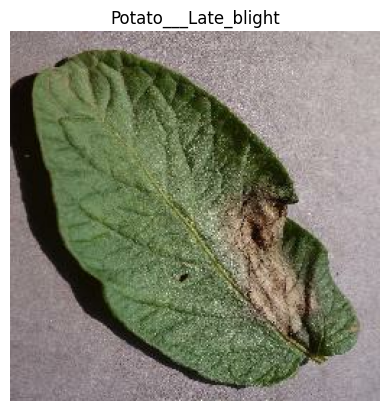

In [ ]:
for batch,label in dataset.take(1):
  print(batch.shape)   #now batch is a numpy aray with 32 imagees
  print(label.numpy())


  plt.title(class_names[label[0]])
  plt.axis('off')
  plt.imshow(batch[0].numpy().astype('uint8'))




above is no. of images in a batch,resolution,resolution and 3 rgb channels


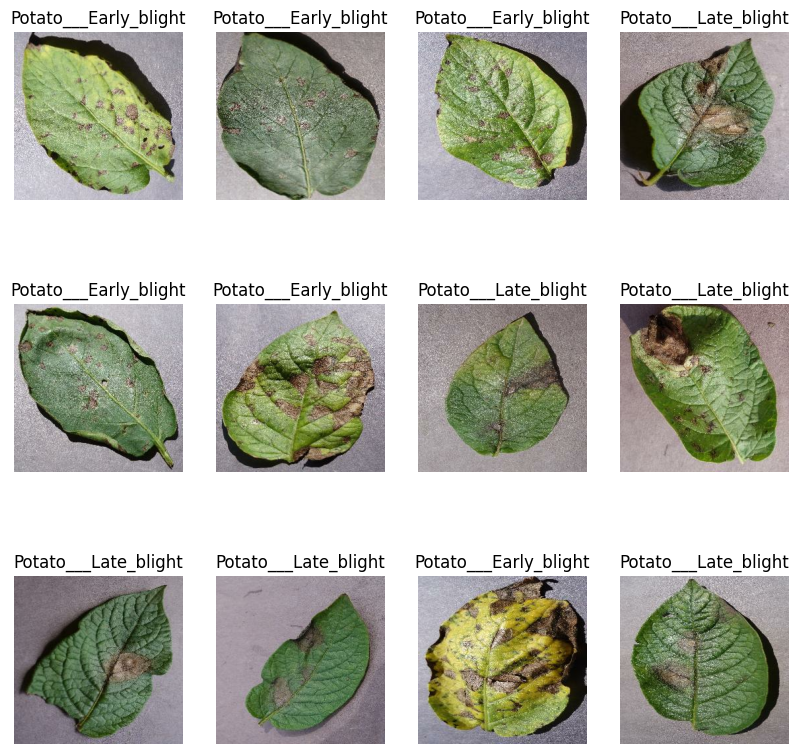

In [ ]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

Lets take 80 % training

10 % validation along with training dataset

10 % testing the model to see if it predicts right

In [ ]:
train_size =int(0.8 * len(dataset))
train_ds = dataset.take(train_size)

remaining_ds = dataset.skip(train_size)
val_ds = remaining_ds.take(3)
test_ds= remaining_ds.skip(3)

getting validation and test

defining a method for al the above code

In [ ]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [ ]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)
print(len(train_ds))
print(len(val_ds))
print(len(test_ds))

18
2
3


### Cache, Shuffle, and Prefetch the Dataset

we cache the dataset so it can run on both cpu and gpu , codebasic deep learning tutorial 44

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
print(train_ds.take(1))

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


tf.data.Dataset contains a number of batches, and in each batch, there are a number of images and their corresponding labels.

You can access the images and labels in a tf.data.Dataset by iterating over the dataset, where each iteration gives you a batch of images and their corresponding labels.

In [ ]:
#analyzing structure of tf dataset
for batch , label in train_ds.take (1):
  print(batch.shape)
  print(label.shape)
  print(label.numpy)
  print(batch.numpy())


(32, 256, 256, 3)
(32,)
<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(32,), dtype=int32, numpy=
array([1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 2, 1, 0, 1, 0, 0, 0, 0, 1], dtype=int32)>>
[[[[141. 119. 121.]
   [148. 126. 128.]
   [150. 128. 130.]
   ...
   [135. 105. 105.]
   [141. 111. 111.]
   [144. 114. 114.]]

  [[140. 118. 120.]
   [139. 117. 119.]
   [140. 118. 120.]
   ...
   [147. 117. 117.]
   [152. 122. 122.]
   [127.  97.  97.]]

  [[148. 126. 128.]
   [139. 117. 119.]
   [140. 118. 120.]
   ...
   [141. 111. 111.]
   [149. 119. 119.]
   [137. 107. 107.]]

  ...

  [[171. 150. 149.]
   [173. 152. 151.]
   [164. 143. 142.]
   ...
   [134. 104. 102.]
   [142. 112. 110.]
   [155. 125. 123.]]

  [[173. 152. 151.]
   [182. 161. 160.]
   [171. 150. 149.]
   ...
   [144. 114. 112.]
   [151. 121. 119.]
   [156. 126. 124.]]

  [[174. 153. 152.]
   [188. 167. 166.]
   [181. 160. 159.]
   ...
   [144. 114. 112.]
   [139. 109. 107.]
   [12

In [ ]:
for batch , label in train_ds.take (1):
  print(batch.shape)
  print(label.shape)


(32, 256, 256, 3)
(32,)


In [ ]:
resize_and_rescale = tf.keras.Sequential([
  tf.keras.layers.Resizing(img_size , img_size ),
  tf.keras.layers.Rescaling(1./255),
])

In [ ]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip(mode="horizontal_and_vertical", seed=None ),
  tf.keras.layers.RandomRotation(0.2),
])

keras.Sequential is a class in Keras, a high-level API for building and training deep learning models. The Sequential class is used to create a linear stack of layers, where you can add one layer at a time from the input layer to the output layer. This is suitable for building simple neural network architectures where each layer has exactly one input tensor and one output tensor.


In [ ]:
inp_shape = (batch_size,img_size,img_size,channels)

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=inp_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.GlobalAveragePooling2D(),
    layers.Dense(32, activation='relu'),
    layers.Dense(3, activation='softmax'),  # for 3 classes
])

model.build(input_shape=inp_shape)

In [ ]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_5 (Sequential)            │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_6 (Sequential)            │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (32, 254, 254, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (32, 127, 127, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (32, 125, 125, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (32, 62, 62, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (32, 60, 60, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (32, 30, 30, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (32, 28, 28, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (32, 14, 14, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (32, 12, 12, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (32, 6, 6, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (32, 32)                    │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (32, 32)                    │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (32, 3)                     │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,987 (132.76 KB)

 Trainable params: 33,987 (132.76 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history = model.fit(train_ds ,            #records history to plot
          epochs=30,
          batch_size=batch_size,
          verbose=1,
          validation_data=val_ds
          )

Epoch 1/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.5817 - loss: 0.9958 - val_accuracy: 0.5469 - val_loss: 0.8801
Epoch 2/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - accuracy: 0.5976 - loss: 0.8370 - val_accuracy: 0.5469 - val_loss: 0.8753
Epoch 3/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.5918 - loss: 0.7870 - val_accuracy: 0.5469 - val_loss: 0.8302
Epoch 4/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.5860 - loss: 0.7875 - val_accuracy: 0.5469 - val_loss: 0.7751
Epoch 5/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.6375 - loss: 0.7130 - val_accuracy: 0.5625 - val_loss: 0.8564
Epoch 6/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.6926 - loss: 0.6616 - val_accuracy: 0.5938 - val_loss: 0.7299
Epoch 7/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.7072 - loss: 0.6257 - val_accuracy: 0.6719 - val_loss: 0.6349
Epoch 8/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.7119 - loss: 0.5986 - val_accuracy: 0.5781 - val_loss:

In [ ]:
loss,accuracy = model.evaluate(test_ds)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 364ms/step - accuracy: 0.8187 - loss: 0.7235


In [ ]:
loss,accuracy

(0.6424981355667114, 0.8311688303947449)

In [ ]:
#model.save('/content/drive/MyDrive/datasets/Plant village/image_classification_model.keras')